In [6]:
# import libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [7]:
def read_dataframe():
    """Function to read the climate dataframe and remove columns which have anomolous data"""
    """Returns the climate dataframe"""
    climate_change_df = pd.read_excel("climate-change-excel-4-6-mb-.xls")
    climate_change_df.drop(columns=[2009, 2010, 2011], inplace=True)
    return climate_change_df
climate_change_df = read_dataframe()
climate_change_df.head()

,Country code,Country name,Series code,Series name,SCALE,Decimals,1990,1991,1992,1993,...,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008
0,ABW,Aruba,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,29.57481,..,..,..,...,..,29.57481,..,..,..,..,..,..,..,..
1,ADO,Andorra,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,0,..,..,..,...,..,0,..,..,..,..,..,..,..,..
2,AFG,Afghanistan,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,0,..,..,..,...,..,0,..,..,..,..,..,..,..,..
3,AGO,Angola,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,0.208235,..,..,..,...,..,0.208235,..,..,..,..,..,..,..,..
4,ALB,Albania,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,4.967875,..,..,..,...,..,4.967875,..,..,..,..,..,..,..,..


In [8]:
# List of features to consider for the assignment
climate_change_df["Series name"].unique()

array(['Land area below 5m (% of land area)',
       'Agricultural land under irrigation (% of total ag. land)',
       'Cereal yield (kg per hectare)',
       'Foreign direct investment, net inflows (% of GDP)',
       'Access to electricity (% of total population)',
       'Energy use per units of GDP (kg oil eq./$1,000 of 2005 PPP $)',
       'Energy use per capita (kilograms of oil equivalent)',
       'CO2 emissions, total (KtCO2)',
       'CO2 emissions per capita (metric tons)',
       'CO2 emissions per units of GDP (kg/$1,000 of 2005 PPP $)',
       'Other GHG emissions, total (KtCO2e)',
       'Methane (CH4) emissions, total (KtCO2e)',
       'Nitrous oxide (N2O) emissions, total (KtCO2e)',
       'Annex-I emissions reduction target',
       'Disaster risk reduction progress score (1-5 scale; 5=best)',
       'GHG net emissions/removals by LUCF (MtCO2e)',
       'Hosted Clean Development Mechanism (CDM) projects',
       'Hosted Joint Implementation (JI) projects',
       'Av

In [9]:
def fix_empty_records(climate_change_df):
    """ Filling the Null spaces with appropriate values"""
    for column in climate_change_df._get_numeric_data().columns:
        print("Filling median values in the column "+column)
        climate_change_df[column] = np.mean(climate_change_df[column])

    climate_change_df = climate_change_df.replace("..", 0)
    return climate_change_df
climate_change_df = fix_empty_records(climate_change_df)
climate_change_df.head()

,Country code,Country name,Series code,Series name,SCALE,Decimals,1990,1991,1992,1993,...,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008
0,ABW,Aruba,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,29.574810,0.0,0.0,0.0,...,0.0,29.574810,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ADO,Andorra,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,AFG,Afghanistan,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,AGO,Angola,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,0.208235,0.0,0.0,0.0,...,0.0,0.208235,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ALB,Albania,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,4.967875,0.0,0.0,0.0,...,0.0,4.967875,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
def transform_df(climate_change_df):
#     Melt converts column headers to variable column with headers in each row, the value held by the column is set in the record like a transpose.
    climate_change_df = climate_change_df.melt(id_vars=["Country code", "Country name", "Series code", "Series name", "SCALE", "Decimals"], 
        var_name="Year", 
        value_name="Value")
    return climate_change_df
climate_change_df = transform_df(climate_change_df)
climate_change_df.head()

,Country code,Country name,Series code,Series name,SCALE,Decimals,Year,Value
0,ABW,Aruba,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,1990,29.574810
1,ADO,Andorra,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,1990,0.000000
2,AFG,Afghanistan,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,1990,0.000000
3,AGO,Angola,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,1990,0.208235
4,ALB,Albania,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,1990,4.967875


In [11]:
# Retreiving the required series code for the assignment
co2_emission_df = climate_change_df[climate_change_df["Series name"] == 'CO2 emissions, total (KtCO2)']
population_df = climate_change_df[climate_change_df["Series name"] == 'Population']
energyuse_df = climate_change_df[climate_change_df["Series name"] == 'Energy use per units of GDP (kg oil eq./$1,000 of 2005 PPP $)']
populationgrowth_df = climate_change_df[climate_change_df["Series name"] == 'Population growth (annual %)']                                  

In [12]:
co2_emission_df.head()

,Country code,Country name,Series code,Series name,SCALE,Decimals,Year,Value
1631,ABW,Aruba,EN.ATM.CO2E.KT,"CO2 emissions, total (KtCO2)",0,1,1990,1840.834
1632,ADO,Andorra,EN.ATM.CO2E.KT,"CO2 emissions, total (KtCO2)",0,1,1990,0.000
1633,AFG,Afghanistan,EN.ATM.CO2E.KT,"CO2 emissions, total (KtCO2)",0,1,1990,2676.910
1634,AGO,Angola,EN.ATM.CO2E.KT,"CO2 emissions, total (KtCO2)",0,1,1990,4429.736
1635,ALB,Albania,EN.ATM.CO2E.KT,"CO2 emissions, total (KtCO2)",0,1,1990,7488.014


In [13]:
population_df.head()

,Country code,Country name,Series code,Series name,SCALE,Decimals,Year,Value
12814,ABW,Aruba,SP.POP.TOTL,Population,0,0,1990,62147.0
12815,ADO,Andorra,SP.POP.TOTL,Population,0,0,1990,52773.0
12816,AFG,Afghanistan,SP.POP.TOTL,Population,0,0,1990,19023678.0
12817,AGO,Angola,SP.POP.TOTL,Population,0,0,1990,10335052.0
12818,ALB,Albania,SP.POP.TOTL,Population,0,0,1990,3289483.0


In [14]:
country_list = ["SOM", "MDG", "CHE", "GBR"]

In [15]:
populationgrowth_df.mean()

SCALE          0.00000
Decimals       1.00000
Year        1999.00000
Value          1.49945
dtype: float64

In [16]:
energyuse_df.mean()

SCALE          0.000000
Decimals       1.000000
Year        1999.000000
Value        162.114917
dtype: float64

In [17]:
import statistics as stat
print(stat.pvariance(populationgrowth_df['Value']))
print(stat.pvariance(energyuse_df['Value']))

2.476021221022916
38597.3164146675


In [18]:
# summarize'
data1 = populationgrowth_df['Value'].mean()
data2 = populationgrowth_df[['Value']].std()
print('data1: mean=%.3f stdv=%.3f' % (stat.mean(populationgrowth_df['Value']), stat.stdev(populationgrowth_df['Value'])))
print('data2: mean=%.3f stdv=%.3f' % (stat.mean(energyuse_df['Value']), stat.stdev(energyuse_df['Value'])))

data1: mean=1.499 stdv=1.574
data2: mean=162.115 stdv=196.484


In [19]:
populationgrowth_df.head()

,Country code,Country name,Series code,Series name,SCALE,Decimals,Year,Value
12582,ABW,Aruba,SP.POP.GROW,Population growth (annual %),0,1,1990,1.820254
12583,ADO,Andorra,SP.POP.GROW,Population growth (annual %),0,1,1990,2.945970
12584,AFG,Afghanistan,SP.POP.GROW,Population growth (annual %),0,1,1990,2.082624
12585,AGO,Angola,SP.POP.GROW,Population growth (annual %),0,1,1990,2.771320
12586,ALB,Albania,SP.POP.GROW,Population growth (annual %),0,1,1990,1.027427


In [20]:
from scipy.stats import pearsonr
corr, _ = pearsonr(populationgrowth_df['Year'] , populationgrowth_df['Value'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.035


In [21]:
corr_country_df1 = populationgrowth_df[populationgrowth_df["Country code"]=='GBR']
corr_country_df2 = populationgrowth_df[populationgrowth_df["Country code"]=='SOM']
df3 = corr_country_df1[["Value","Year"]].merge(corr_country_df2[["Value","Year"]],on=["Year"])

#df3.columns=['value_x','year_x','value_y','year_y']

df3.head()

,Value_x,Year,Value_y
0,0.298929,1990,0.441006
1,0.309248,1991,-0.214952
2,0.270433,1992,-0.635248
3,0.239744,1993,-0.689632
4,0.254586,1994,-0.218476


In [22]:
df3.fillna(0)

,Value_x,Year,Value_y
0,0.298929,1990,0.441006
1,0.309248,1991,-0.214952
2,0.270433,1992,-0.635248
3,0.239744,1993,-0.689632
4,0.254586,1994,-0.218476
5,0.264547,1995,0.622175
6,0.254626,1996,1.579217
7,0.257555,1997,2.356870
8,0.291404,1998,2.851465
9,0.333406,1999,2.965498


In [23]:
df3.corr()

,Value_x,Value_y
Value_x,1.000000,0.453289
Value_y,0.453289,1.000000


#Value_x and Value_y represent the correlation between countries (SOM and GBR). There is 45% change across years

In [24]:
climate_change_df.describe()

,Value
count,1.903230e+05
mean,1.331688e+10
std,5.033268e+11
min,-2.999606e+03
25%,0.000000e+00
50%,0.000000e+00
75%,3.950395e+01
max,6.125854e+13


#Value_x and Value_y represent the correlation between countries (SOM and GBR). There is 45% change a

In [25]:
co2_emission_df.describe()

,Value
count,4.427000e+03
mean,4.738307e+05
std,2.267826e+06
min,-2.999606e+03
25%,4.822105e+02
50%,5.379489e+03
75%,6.179812e+04
max,3.064936e+07


In [26]:
population_df.describe()

,Value
count,4.427000e+03
mean,1.396536e+08
std,6.376223e+08
min,0.000000e+00
25%,6.267520e+05
50%,5.382438e+06
75%,2.270554e+07
max,6.686776e+09


In [27]:
for country in country_list:
    print("country:"+country)
    print(populationgrowth_df[populationgrowth_df["Country code"]==country].describe())
print("World:")
print(populationgrowth_df.describe()) 

country:SOM
           Value
count  19.000000
mean    1.610545
std     1.274526
min    -0.689632
25%     0.531590
50%     2.219693
75%     2.472023
max     2.965498
country:MDG
           Value
count  19.000000
mean    3.047954
std     0.074912
min     2.937870
25%     2.988072
50%     3.035146
75%     3.111822
max     3.161368
country:CHE
           Value
count  19.000000
mean    0.738182
std     0.293318
min     0.197712
25%     0.622503
50%     0.687425
75%     0.902941
max     1.302564
country:GBR
           Value
count  19.000000
mean    0.383727
std     0.145502
min     0.239744
25%     0.267490
50%     0.333406
75%     0.454773
max     0.664934
World:
             Value
count  4408.000000
mean      1.499450
std       1.573716
min     -10.955149
25%       0.519449
50%       1.455921
75%       2.405228
max      18.588317


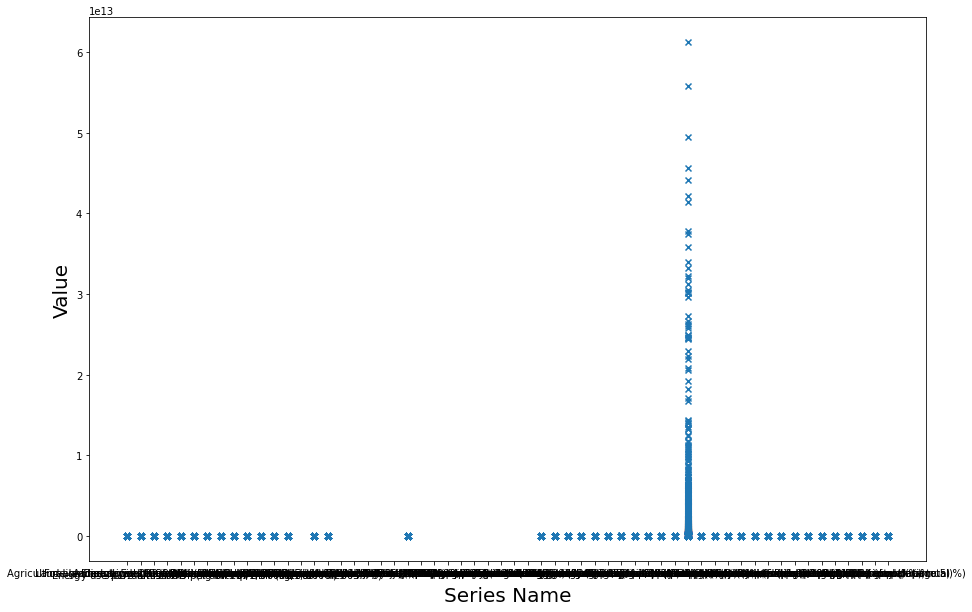

In [28]:
plt.figure(figsize=(15, 10)) 
plt.scatter(climate_change_df["Series name"], climate_change_df["Value"], marker='x')
plt.xlabel("Series Name", fontsize=20)
plt.ylabel("Value", fontsize=20)
plt.show()

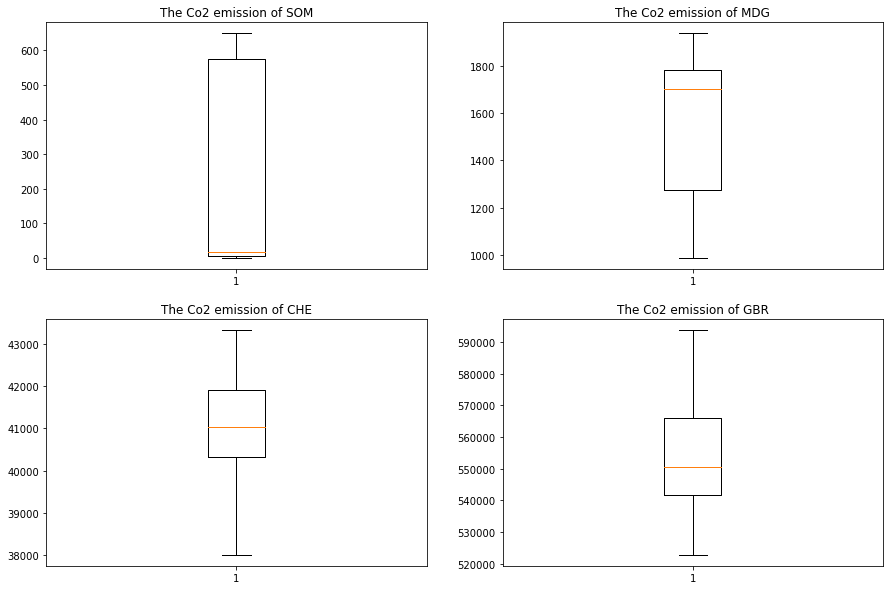

In [29]:
plt.figure(figsize=(15, 10)) 
iter = 1
for country_code in country_list:
    plt.subplot(2,2,iter)
    iter += 1
    temp_df = co2_emission_df[co2_emission_df["Country code"] == country_code]
    plt.boxplot(temp_df["Value"])
    plt.title("The Co2 emission of "+country_code)
plt.show()

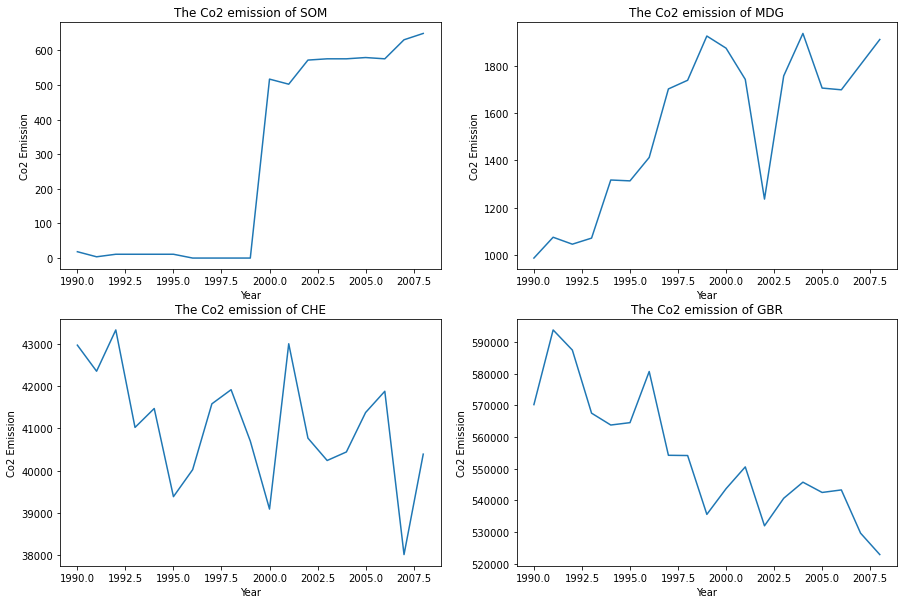

In [30]:
plt.figure(figsize=(15, 10)) 
iter = 1
for country_code in country_list:
    plt.subplot(2,2,iter)
    iter += 1
    temp_df = co2_emission_df[co2_emission_df["Country code"] == country_code]
    plt.plot(temp_df["Year"], temp_df["Value"])
    plt.xlabel("Year")
    plt.ylabel("Co2 Emission")
    plt.title("The Co2 emission of "+country_code)
plt.show()

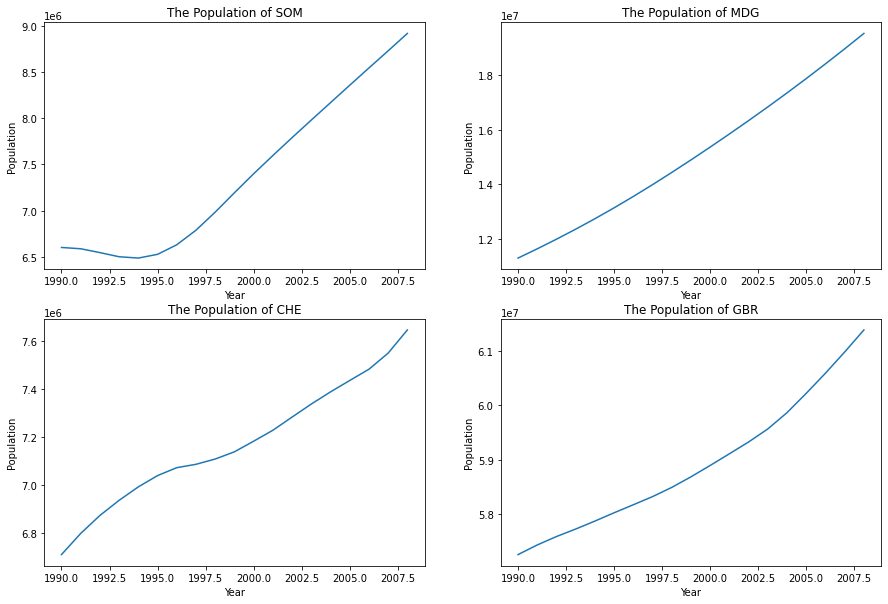

In [31]:
plt.figure(figsize=(15, 10)) 
iter = 1
for country_code in country_list:
    plt.subplot(2,2,iter)
    iter += 1
    temp_df = population_df[population_df["Country code"] == country_code]
    plt.plot(temp_df["Year"], temp_df["Value"])
    plt.xlabel("Year")
    plt.ylabel("Population")
    plt.title("The Population of "+country_code)
plt.show()

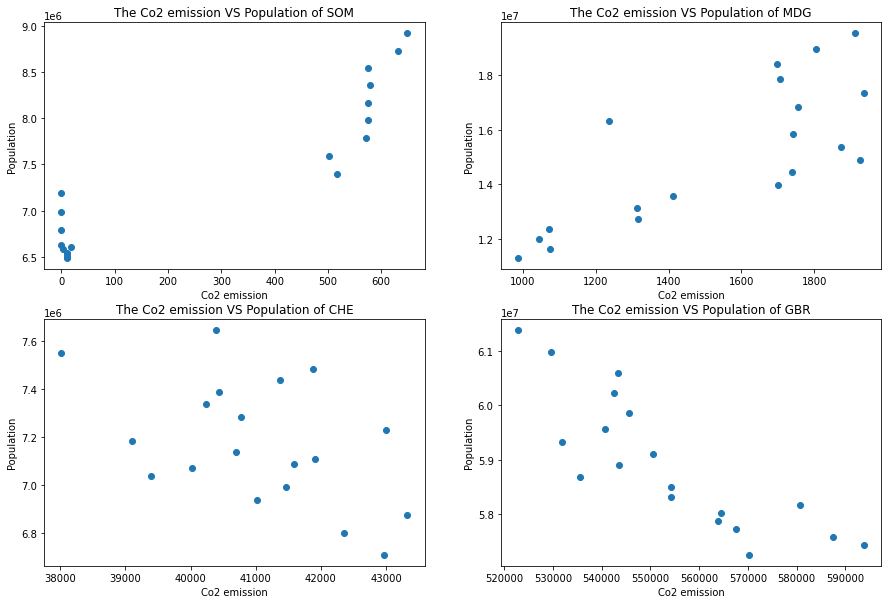

In [32]:
plt.figure(figsize=(15, 10)) 
iter = 1
for country_code in country_list:
    plt.subplot(2,2,iter)
    iter += 1
    temp_df1 = co2_emission_df[co2_emission_df["Country code"] == country_code]
    temp_df2 = population_df[population_df["Country code"] == country_code]
    merged_df = temp_df1.merge(temp_df2, on=["Country code", "Year"])
    plt.scatter(merged_df["Value_x"], merged_df["Value_y"])
    plt.xlabel("Co2 emission")
    plt.ylabel("Population")
    plt.title("The Co2 emission VS Population of "+country_code)
plt.show()